In [3]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from sklearn.datasets import load_boston
load_boston=load_boston()
x=load_boston.data
y=load_boston.target

data=pd.dataframe(x,columns=load_boston.feature_names)
data["salesprice"]=y
data.head()


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [56]:

data_url = "http://lib.stat.cmu.edu/datasets/boston"
# Use a raw string (r'') to avoid the warning
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

data=pd.DataFrame(data,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
data["SalePrice"]=target
data.head()





,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [57]:
print(data.shape)

(506, 14)


In [58]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    float64
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    float64
 9   TAX        506 non-null    float64
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


In [59]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [60]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

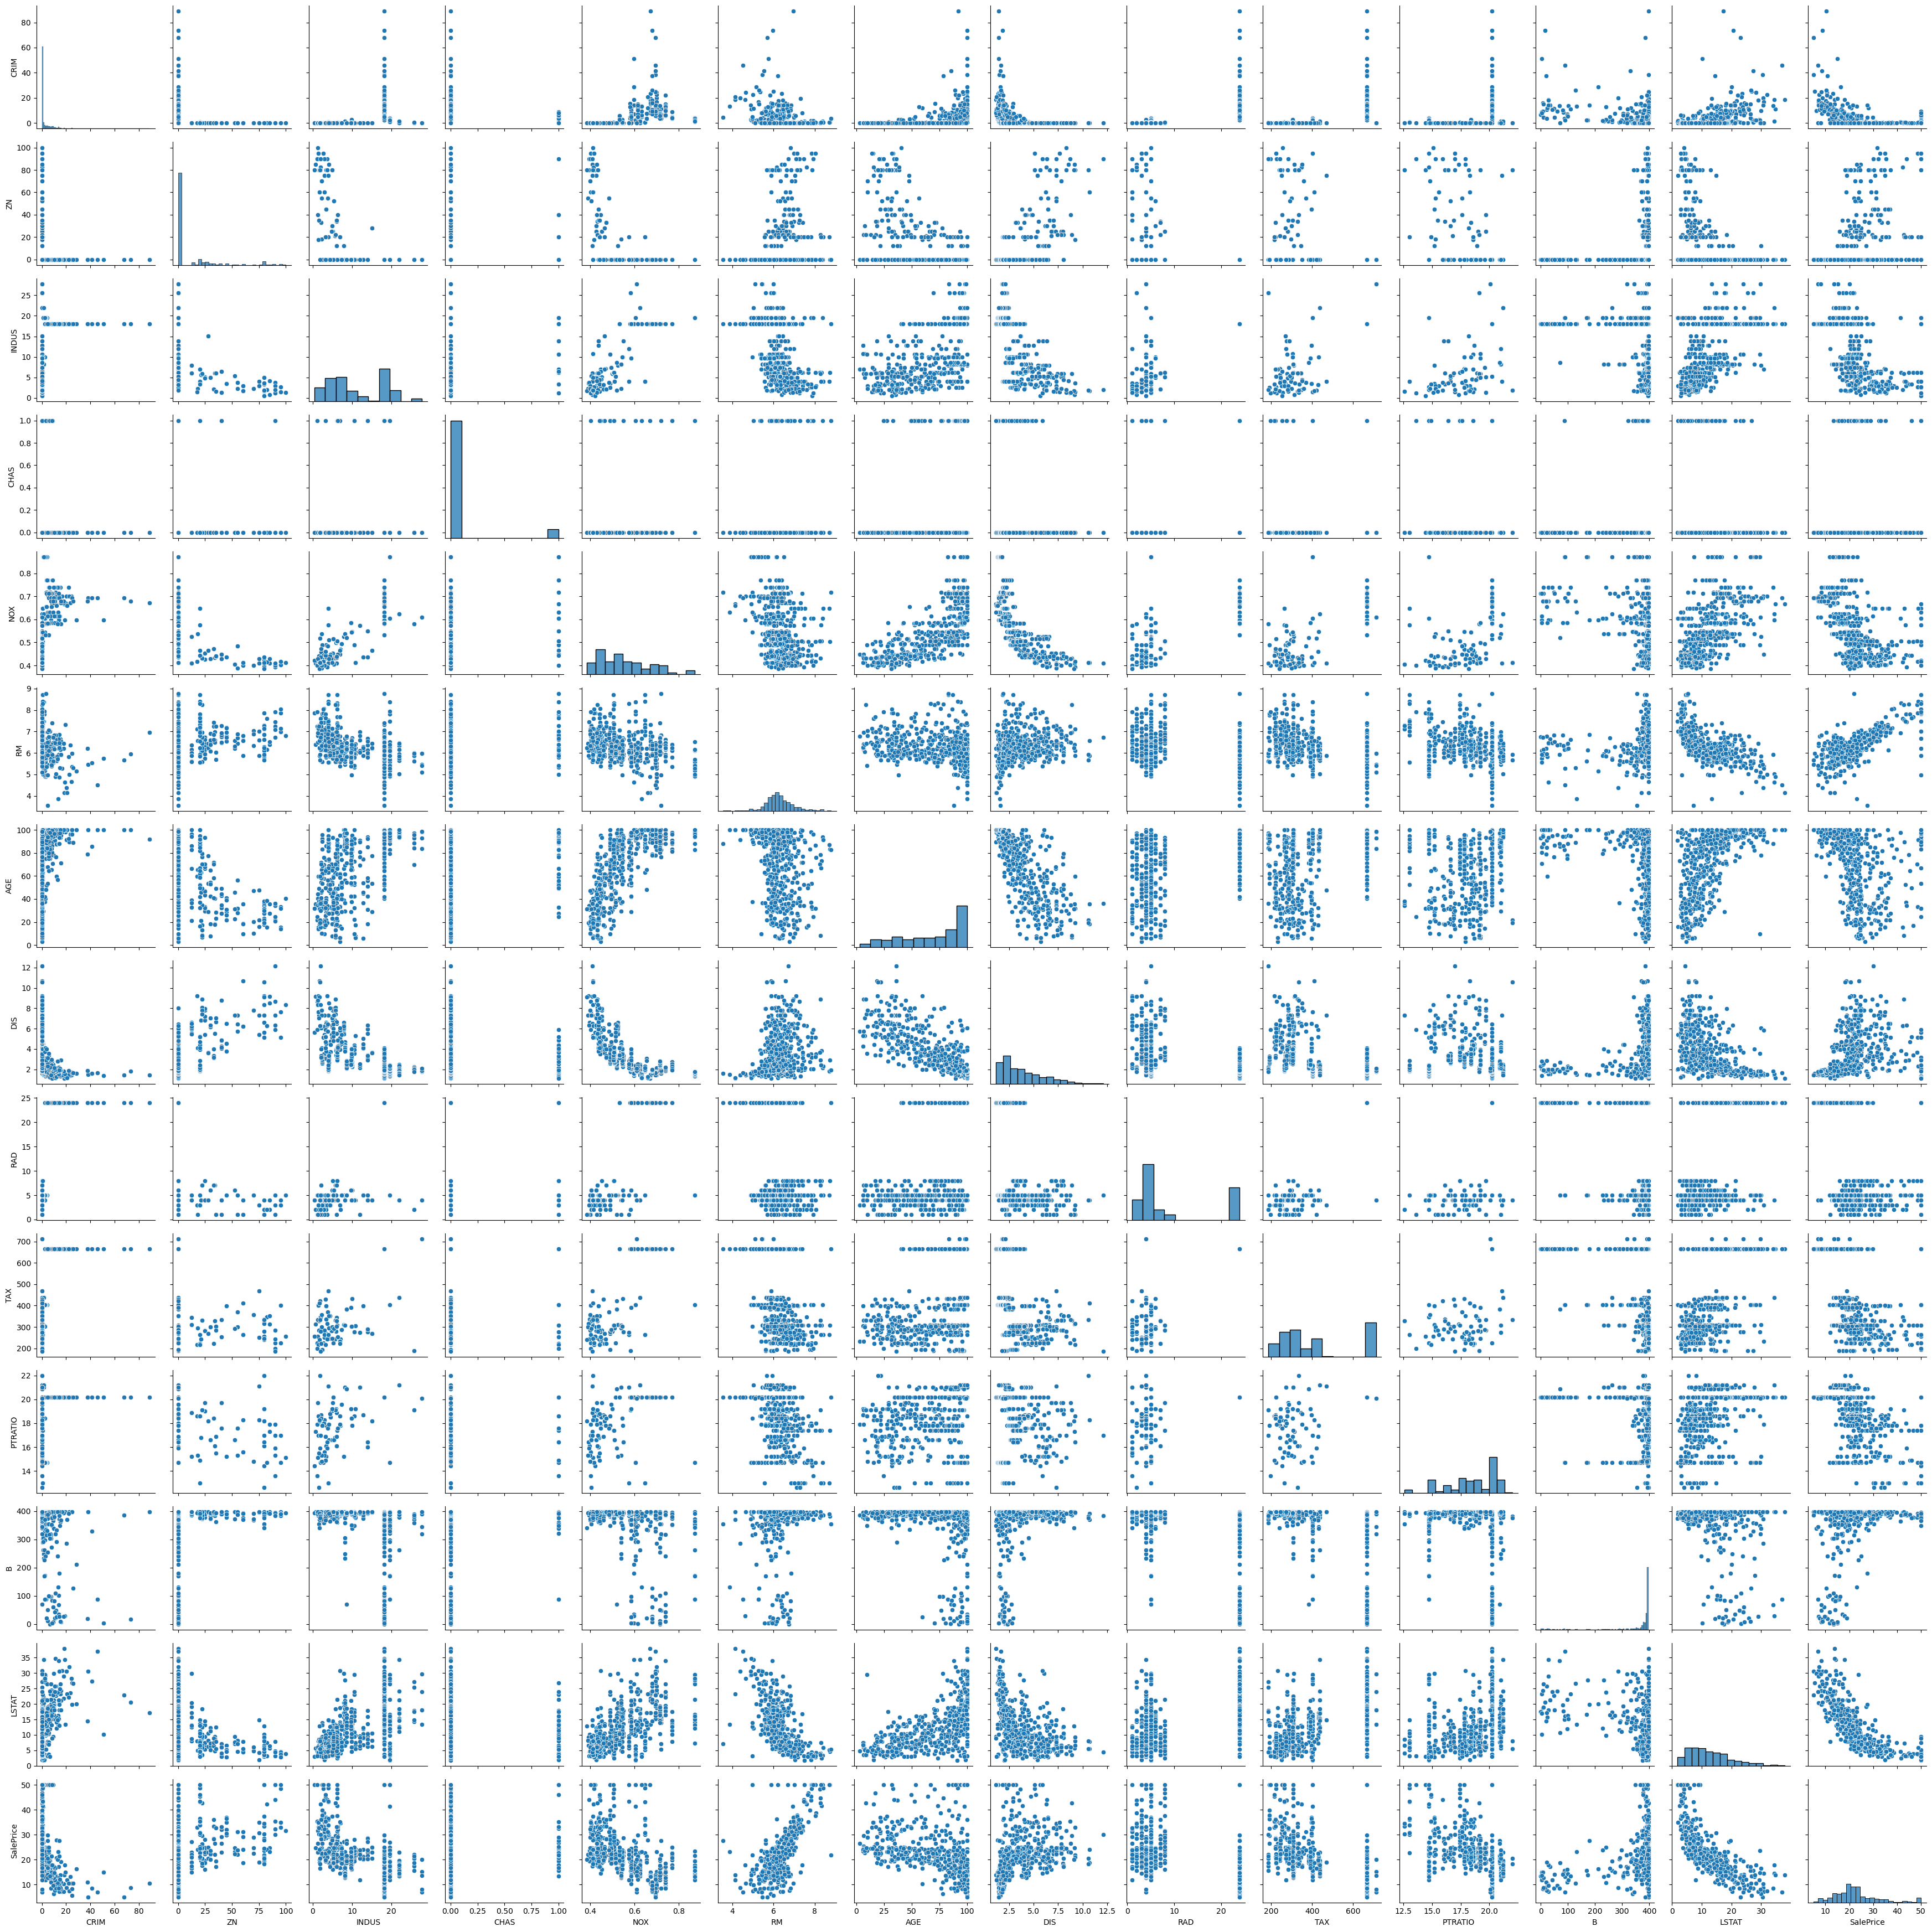

In [61]:
sns.pairplot(data,height=2.5)
plt.tight_layout()

C:\Users\haind\AppData\Local\Temp\ipykernel_55084\3545255702.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

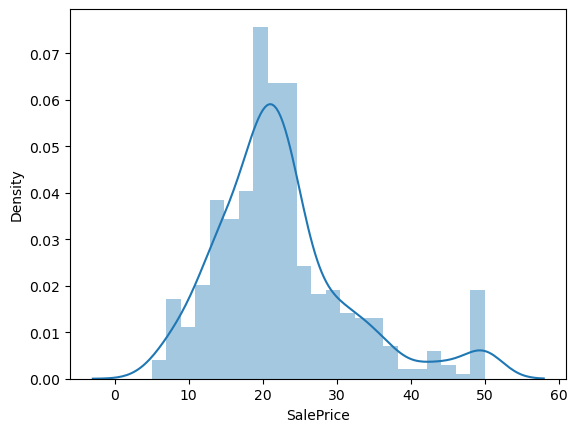

In [63]:
sns.distplot(data['SalePrice'])

In [64]:
print("skew=",data['SalePrice'].skew())

skew= 1.1080984082549072


In [65]:
print("kurtosis=",data['SalePrice'].kurtosis())

kurtosis= 1.495196944165818


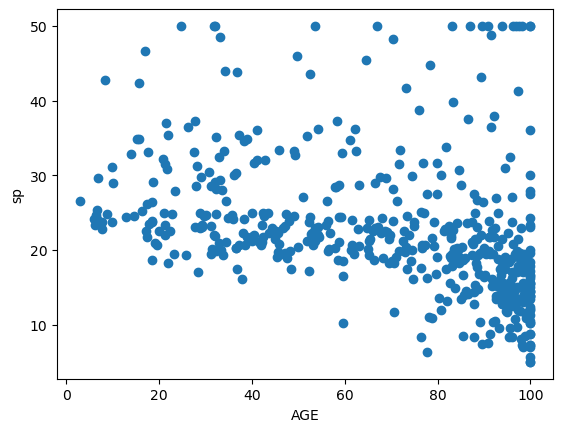

In [66]:
fig,ax=plt.subplots()
ax.scatter(x=data['AGE'],y=data['SalePrice'])
plt.ylabel('sp')
plt.xlabel('AGE')
plt.show()

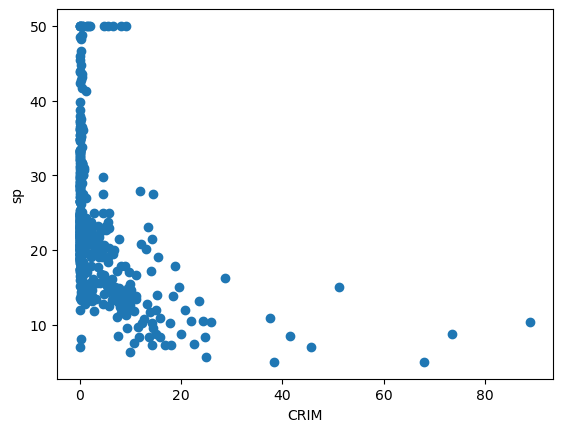

In [67]:
fig,ax=plt.subplots()
ax.scatter(x=data['CRIM'],y=data['SalePrice'])
plt.ylabel('sp')
plt.xlabel('CRIM')
plt.show()

In [47]:
data[data["CRIM"]>88]

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalesPrice,salesprice
380,88.9762,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.9,17.21,10.4


In [68]:
from sklearn.model_selection import train_test_split

In [70]:
x=data.drop("SalePrice",axis=1)

In [72]:
y=data["SalePrice"]

In [74]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [77]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((404, 13), (404,), (102, 13), (102,))

In [79]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [82]:
predictions=lr.predict(xtest)

In [84]:
print(" actual value=",ytest[0],"prediction made=",predictions[0])

 actual value= 24.0 prediction made= 28.996723619824962


In [88]:
from sklearn.metrics import mean_squared_error
import math
mse=mean_squared_error(ytest,predictions)
rmse=math.pow(mse,0.5)
print(mse," ",rmse)


24.291119474973613   4.928602182665346


In [102]:
xtest[xtest["CRIM"]==0.09178]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.51,6.416,84.1,2.6463,5.0,296.0,16.6,395.5,9.04


In [103]:
ytest[0]

24.0

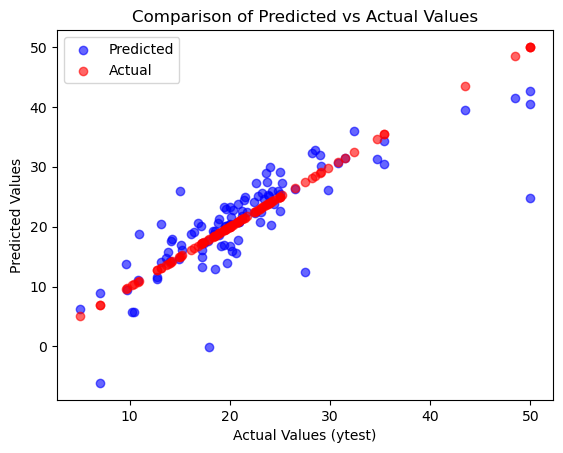

In [115]:


# Assuming ytest and predictions are already defined
fig, ax = plt.subplots()

# Plot the actual values (ytest) vs index (or whatever makes sense)
ax.scatter(ytest, predictions, color='blue', label='Predicted', alpha=0.6)

# Plot the predicted values (predictions) vs index
ax.scatter(ytest, ytest, color='red', label='Actual', alpha=0.6)

# Add labels and title
plt.xlabel('Actual Values (ytest)', color='black')
plt.ylabel('Predicted Values', color='black')
plt.title('Comparison of Predicted vs Actual Values')

# Add legend
ax.legend()

# Show the plot
plt.show()


In [116]:
ytest,predictions


(173    23.6
 274    32.4
 491    13.6
 72     22.8
 452    16.1
        ... 
 412    17.9
 436     9.6
 411    17.2
 86     22.5
 75     21.4
 Name: SalePrice, Length: 102, dtype: float64,
 array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
        23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
        24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
        26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
        27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
        15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
        22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
        16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
        13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
        16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
        21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       